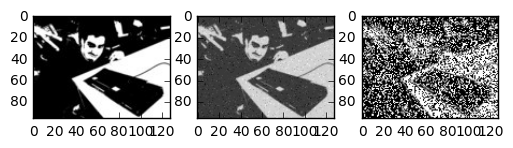

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy import signal
def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] = im2[index] + e[index]
    return im2
def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2
# proportion of pixels to alter
prop = 0.3
varSigma = 0.1
im = imread("../images/manan_grey_resize.jpg")
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im2 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im2,cmap='gray')

In [2]:
def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        #expand this to include diagonal elements
        return -1

(96, 128)
False
709.392156863 709.392156863
(1.7813392156862744, 1.7807392156862745)
(1.7813392156862744, 1.7803392156862745)
(5.9378030952936287, 5.9318682601104973)
[[-1.  1. -1. ..., -1. -1.  1.]
 [ 1. -1. -1. ..., -1.  1.  1.]
 [ 1. -1. -1. ..., -1. -1. -1.]
 ..., 
 [-1. -1.  1. ...,  1. -1. -1.]
 [-1. -1.  1. ...,  1.  1. -1.]
 [-1. -1. -1. ...,  1.  1.  1.]]
initialised X i.e. latent image
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
one iteration of ICM done
We compeleted  20  iterations
False
1.0
1.0
0.0


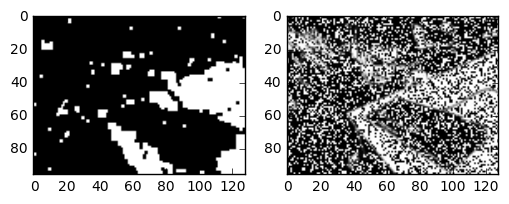

In [3]:
print(im2.shape)
# print(im2.item((34, 123)))
# print(im2.item((36, 123)))
# print(im2.item((33, 45)))

def heightWidth(image):
    #width is the bigger one, the second one
    return image.shape[0], image.shape[1]

def bookEnergyOld(image, xImage, point):
    height, width = heightWidth(image)
    
    finalSumPos = 0
    finalSumNeg = 0
    for m in range(height):
        for n in range(width):
            if ((m, n) == point):
                finalSumPos += image.item((m, n)) * 1
                finalSumNeg += image.item((m, n)) * -1
            else:
                finalSumPos += image.item((m, n)) * xImage.item((m, n))
                finalSumNeg += image.item((m, n)) * xImage.item((m, n))
                
    middleSumPos = 0
    middleSumNeg = 0
    for m in range(height):
        for n in range(width):
            neighbourList = neighbours(m, n, height, width, size=4)
            for neighbour in neighbourList:
                if ((m, n) == point):
                    middleSumPos += 1 * xImage.item(neighbour)
                    middleSumNeg += -1 * xImage.item(neighbour)
                else:
                    middleSumPos += xImage.item((m, n)) * xImage.item(neighbour)
                    middleSumNeg += xImage.item((m, n)) * xImage.item(neighbour)
    totalSumPos = finalSumPos + middleSumPos
    totalSumNeg = finalSumNeg + middleSumNeg
    return totalSumPos/10000, totalSumNeg/10000
    
def bookEnergy(image, xImage, point):
    #last term
    height, width = heightWidth(image)
    
    kernel = np.array([[0,1,0],
                       [1,0,1],
                       [0,1,0]])
    xImage[point] = 1
    XY_multiplied_pos = np.multiply(image, xImage)
    finalSumPos = np.sum(XY_multiplied_pos)
    XN_convolved_pos = signal.convolve2d(xImage, kernel, mode='same')
    XN_multiplied_pos = np.multiply(xImage, XN_convolved_pos)
    middleSumPos = np.sum(XN_multiplied_pos)
    
    xImage[point] = -1
    XY_multiplied_neg = np.multiply(image, xImage)    
    finalSumNeg = np.sum(XY_multiplied_neg)
    XN_convolved_neg = signal.convolve2d(xImage, kernel, mode='same')
    XN_multiplied_neg = np.multiply(xImage, XN_convolved_neg)
    middleSumNeg = np.sum(XN_multiplied_neg)   
#     middleSumPos = 0
#     middleSumNeg = 0
    totalSumPos = finalSumPos + middleSumPos
    totalSumNeg = finalSumNeg + middleSumNeg
    return totalSumPos/10000, totalSumNeg/10000
    
def jointProb(image, xImage, point):
    Z = 1
    posEnergy, negEnergy = bookEnergy(image, xImage, point)
    posVal = 1/Z * np.exp(posEnergy)
    negVal = 1/Z * np.exp(negEnergy)
    return posVal, negVal

latent_im2 = np.copy(im2)
latent_im2[latent_im2 != 1] = -1

k = np.multiply(im2, latent_im2)
kTot = np.sum(k)

print(np.array_equal(im2, latent_im2))
k1 = np.multiply(im2, latent_im2)
k1Tot = np.sum(k1)

print(kTot, k1Tot)

print(bookEnergyOld(im2, latent_im2, (34, 123)))
print(bookEnergy(im2, latent_im2, (34, 123)))
print(jointProb(im2, latent_im2, (34, 123)))
    
def ICM(image):
    #set all the x variables to be = y variables
    #i.e. all the latent variables initialised as the image output
    H, W = heightWidth(image)
    X = np.copy(image)
    X[X != 1] = -1
    print(X)
    print("initialised X i.e. latent image")
    for iterations in range(20):
        flag = False
        for i in range(H):
            for j in range(W):
                point = (i,j)
                probPos, probNeg = jointProb(image, X, point)
                if(probPos > probNeg):
                    if(X[point] == -1):
                        flag = True
                        X[point] = 1
                elif(probNeg > probPos):
                    print
                    if(X[point] == 1):
                        flag = True
                        X[point] = -1
        if(flag == False):
            print("bail early")
            break
        print("one iteration of ICM done")
    print("We compeleted ", iterations+1, " iterations")
    
    X[X != 1] = 0
    
    return X

imFIXED = ICM(im2)

print(np.array_equal(im2, imFIXED))

print(imFIXED.item((34, 123)))
print(imFIXED.item((36, 123)))
print(imFIXED.item((33, 45)))

fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(imFIXED,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(im2,cmap='gray')
plt.show()

In [47]:
kernel = np.array([[0,1,0],
                   [1,0,1],
                   [0,1,0]])

array = np.array([[ 1, -1,  1,  1, -1,  1],
                 [ -1,  1, -1,  1,  1, -1],
                 [  1,  1,  1,  1, -1, -1],
                 [  1,  1,  1,  1,  1,  1]])

point = (3, 5)

array[point] = 1
print("\n", array, "\n")
convol = signal.convolve2d(array, kernel, mode='same')
final = np.multiply(array, convol)
print(final)

h, w = heightWidth(array)

itSum = 0
for i in range(h):
    for j in range(w):
        ns = neighbours(i, j, h, w, size=4)
        for n in ns:
            itSum += array[n] * array[(i,j)]
            
print(itSum)
print(np.sum(final))

array[point] = -1
print("\n", array, "\n")
print(signal.convolve2d(array, kernel, mode='same'))
print(array[point])



 [[ 1 -1  1  1 -1  1]
 [-1  1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1]
 [ 1  1  1  1  1  1]] 

[[-2 -3 -1  1 -3 -2]
 [-3 -2 -4  2 -2 -1]
 [ 1  4  2  2 -2  1]
 [ 2  3  3  3  1  0]]
0
0

 [[ 1 -1  1  1 -1  1]
 [-1  1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1]
 [ 1  1  1  1  1 -1]] 

[[-2  3 -1  1  3 -2]
 [ 3 -2  4  2 -2  1]
 [ 1  4  2  2  2 -3]
 [ 2  3  3  3 -1  0]]
-1


In [ ]:
def likeli(image, imPoint, guess):
    if(image(imPoint) == 1 and guess == 1 or image(imPoint) == 0 and guess == -1):
        return 0.9
    return 0.1

def E_noOuterSum(image, point):
    expoSum = 0
    M, N = heightWidth(image)
    i, j = point[0], point[1]
    neighbourList = neighbours(i, j, M, N, size=4)
    for neighbour in neighbourList:
        expoSum += (image.item(neighbour) * image.item(point))
    val = np.exp(expoSum)
    return val


def E0(image):
    expoSum = 0
    M, N = heightWidth(image)
    for i in range(M):
        for j in range(N):
            neighbourList = neighbours(i, j, M, N, size=4)
            for neighbour in neighbourList:
                expoSum += (image.item(neighbour) * image.item((i, j)))
    return expoSum
    
def prob(image, point, guess):
    #p(x, y) = 1/Z_1 * Prod_{i=1}^{N} (exp{L_i(x_i)} * 1/Z_0 * exp{Sum_{j in Neighbours(i)} (w_ij * x_i * x_j)})
    #separate the above into terms
    #ignoring likelihood part for now???
    p = 0
    Z0 = 1
    Z1 = 1
    H, W = heightWidth(image)
    for i in range(H):
        for j in range(W):
            p = p * (likeli(image, point, guess) * 1/Z0 * E_noOuterSum(image, point))
    p = p * 1/Z1
    return p
